## Grupo: Miguel Cabral de Carvalho, Luiz Fernando Paes de Barros Presta e Pedro Dantas Leite


● Resolver em um problema de Visão Computacional utilizando CNNs

● Selecionar uma base de dados de pelo menos 5.000 exemplos.

  ○ A base de dados deve vir de um repositório open-source (por exemplo, Kaggle ou UCI Machine Learning Repository)

  ○ Dividir em treinamento, validação e teste (70%, 15% e 15%, respectivamente)

● O modelo deve ter no mínimo 3 camadas convolucionais e 1 camada densa

● O desempenho do modelo deve ser estudado a partir das seguintes medidas:
acurácia, precisão, sensibilidade e matriz de confusão.

● Utilizar pelo menos uma técnica de regularização (dropout, batch normalization
[pesquisar], weight decay [pesquisar] etc.)

  ○ Verificar o impacto da técnica em relação às métricas de desempenho

● Utilizar alguma técnica de busca por hiperparâmetros (grid search, random search ou otimização)

  ○ Justificar as escolhas e analisar os resultados

● Utilizar a mesma base de dados em uma rede pré-treinada e comparar os
resultados. Exemplos: VGG, ResNet, Inception etc.

● Plotar gráficos de visualização dos resultados, como curva de perda e acurácia ao longo das épocas, exemplos de imagens classificadas correta e incorretamente, feature maps etc.


● Participantes do grupo e tema/dataset (e-mail, ats@cesar.school)

  ○ Deadline: 18/09
  
● Código-fonte, contendo um README com instruções claras de como executar o projeto e reproduzir os resultados (classroom)

  ○ Deadline: 06/10

● Relatório de 5 a 10 páginas incluindo descrição do problema, descrição da base de dados,
arquitetura do modelo, experimentos conduzidos, plots, resultados e conclusões
(classroom)

  ○ Deadline: 06/10

● Apresentação dos resultados para toda a turma (10 minutos), mostrando os resultados e discutindo insights e dificuldades

  ○ Deadline: 07/10 e 09/10

# Bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Carregamento do dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

X = X.astype('float32') / 255.0

y = to_categorical(y, num_classes=10)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 * 0.85 ≈ 0.15

print(f"Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")


Treinamento: (41998, 32, 32, 3), Validação: (9002, 32, 32, 3), Teste: (9000, 32, 32, 3)


# Construção do Modelo
O modelo precisa conter 3 camadas convolucionais, uma camada de pooling, uma camada densa para classificação e realizar a regularização. Nesse sentido, criamo suma função responsável por gerar o modelo.

In [3]:
def build_cnn_model(regularization=None, dropout_rate=0.5):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    if regularization == 'dropout':
        model.add(Dropout(dropout_rate))
    elif regularization == 'batch_norm':
        model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    return model


# Compilação do modelo
Utilizamos da regularização dropout

In [4]:
model = build_cnn_model(regularization='dropout', dropout_rate=0.5)
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


c:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

# Treinamento do modelo
para os callbacks vamos utilizar do EarlyStopping, que treinamento se a validação não melhorar.

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.3274 - loss: 1.9341 - val_accuracy: 0.3076 - val_loss: 2.4455
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5170 - loss: 1.3323 - val_accuracy: 0.5713 - val_loss: 1.1944
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6089 - loss: 1.1036 - val_accuracy: 0.4599 - val_loss: 1.5173
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6601 - loss: 0.9738 - val_accuracy: 0.6720 - val_loss: 0.9800
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6925 - loss: 0.8795 - val_accuracy: 0.6701 - val_loss: 0.9552
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7281 - loss: 0.7892 - val_accuracy: 0.7066 - val_loss: 0.8666
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7490 - loss: 0.7160 - val_accuracy: 0.7323 - val_loss: 0.7932
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7702 - loss: 0

# Avaliação do modelo
para as métricas de desempenho calcularemos: Acurácia, Precisão, Sensibilidade (recall) e a matriz de confusão

## Avaliação no conjunto de teste

Acurácia no Teste: 75.08%
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       904
           1       0.84      0.87      0.86       886
           2       0.66      0.66      0.66       901
           3       0.56      0.62      0.59       963
           4       0.73      0.72      0.72       868
           5       0.64      0.61      0.63       904
           6       0.80      0.85      0.83       858
           7       0.82      0.78      0.80       930
           8       0.86      0.86      0.86       885
           9       0.85      0.82      0.83       901

    accuracy                           0.75      9000
   macro avg       0.75      0.75      0.75      9000
weighted avg       0.75      0.75      0.75      9000



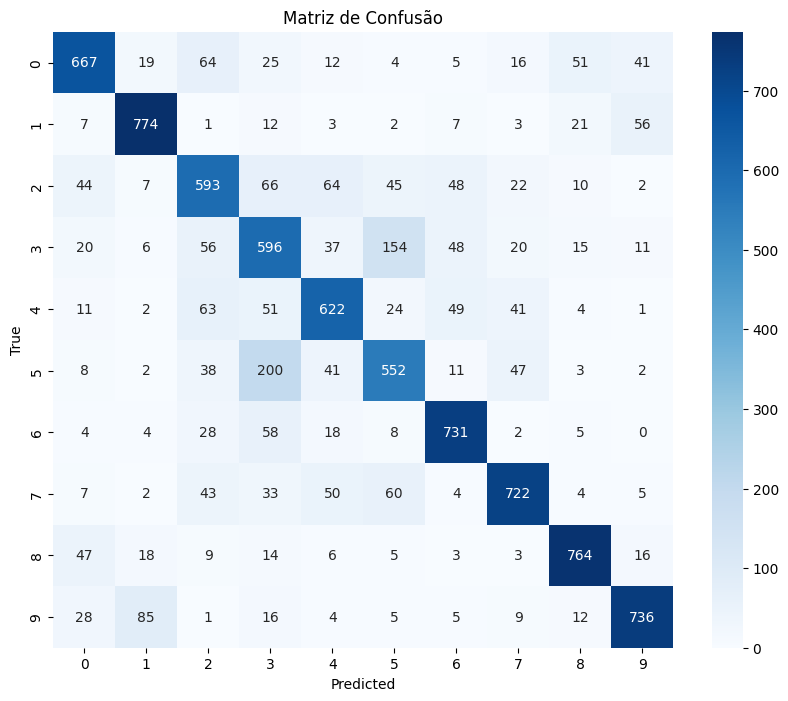

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no Teste: {test_accuracy*100:.2f}%")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()


# Técnicas de regularização: Dropout vs Batch Normalization
Realizaremos uma comparação entre o dropout e a batch normalization

## Dropout

In [7]:
model_dropout = build_cnn_model(regularization='dropout', dropout_rate=0.5)
model_dropout.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train,
                                    epochs=100,
                                    batch_size=64,
                                    validation_data=(X_val, y_val),
                                    callbacks=[early_stop],
                                    verbose=1)

c:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.3227 - loss: 1.9434 - val_accuracy: 0.5111 - val_loss: 1.3719
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5110 - loss: 1.3592 - val_accuracy: 0.6036 - val_loss: 1.0959
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5950 - loss: 1.1390 - val_accuracy: 0.6173 - val_loss: 1.1380
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6422 - loss: 1.0029 - val_accuracy: 0.6865 - val_loss: 0.8935
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6877 - loss: 0.9008 - val_accuracy: 0.6381 - val_loss: 1.0512
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7156 - loss: 0.8199 - val_accuracy: 0.7091 - val_loss: 0.8448
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7381 - loss: 0.7529 - val_accuracy: 0.7172 - val_loss: 0.8303
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7617 - loss: 0

## Batch Normalization

In [8]:
model_batch = build_cnn_model(regularization='batch_norm')
model_batch.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_batch = model_batch.fit(X_train, y_train,
                                epochs=100,
                                batch_size=64,
                                validation_data=(X_val, y_val),
                                callbacks=[early_stop],
                                verbose=1)


Epoch 1/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.4827 - loss: 1.4805 - val_accuracy: 0.5961 - val_loss: 1.1556
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7043 - loss: 0.8486 - val_accuracy: 0.6836 - val_loss: 0.9162
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7689 - loss: 0.6595 - val_accuracy: 0.6904 - val_loss: 0.9020
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8139 - loss: 0.5334 - val_accuracy: 0.7237 - val_loss: 0.8230
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8572 - loss: 0.4159 - val_accuracy: 0.6605 - val_loss: 1.1065
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8883 - loss: 0.3239 - val_accuracy: 0.7271 - val_loss: 0.8870
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9166 - loss: 0.2499 - val_accuracy: 0.7004 - val_loss: 1.0943
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9330 - loss: 0

# Comparação das acurácias

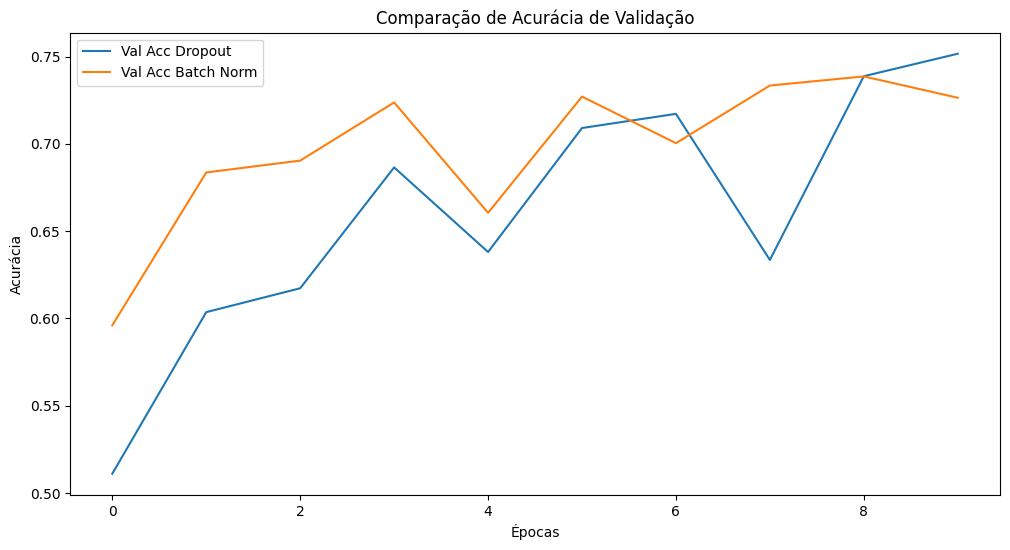

In [9]:
plt.figure(figsize=(12,6))
plt.plot(history_dropout.history['val_accuracy'], label='Val Acc Dropout')
plt.plot(history_batch.history['val_accuracy'], label='Val Acc Batch Norm')
plt.title('Comparação de Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Buscas por hiperparametros
Para a busca por hiperparametros buscaremos melhorar a taxa de aprendizado, numero de filtros nas camadas convolucionais e o tamanho do batch

In [10]:


from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

C:\Users\migue\AppData\Local\Temp\ipykernel_19704\49127719.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [11]:
class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(filters=hp.Int('filters1', min_value=32, max_value=128, step=32),
                         kernel_size=(3,3),
                         activation='relu',
                         padding='same',
                         input_shape=X_train.shape[1:]))
        model.add(MaxPooling2D((2,2)))

        model.add(Conv2D(filters=hp.Int('filters2', min_value=32, max_value=128, step=32),
                         kernel_size=(3,3),
                         activation='relu',
                         padding='same'))
        model.add(MaxPooling2D((2,2)))

        model.add(Conv2D(filters=hp.Int('filters3', min_value=32, max_value=128, step=32),
                         kernel_size=(3,3),
                         activation='relu',
                         padding='same'))
        model.add(MaxPooling2D((2,2)))

        model.add(Flatten())
        model.add(Dense(units=hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

In [13]:
import os
import shutil
from kerastuner import RandomSearch

# Defina o diretório base e o nome do projeto
base_dir = 'cnn_tuner'
project_name = 'cifar10_classification'
project_dir = os.path.join(base_dir, project_name)

# Verifique se o diretório base existe, caso contrário, crie-o
if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    print(f"Diretório base criado: {base_dir}")
else:
    print(f"Diretório base já existe: {base_dir}")

# Verifique se o diretório do projeto existe
if os.path.exists(project_dir):
    if not os.path.isdir(project_dir):
        # Se existir e não for um diretório, remova o arquivo
        os.remove(project_dir)
        print(f"Arquivo removido: {project_dir}")
        # Crie o diretório do projeto
        os.makedirs(project_dir)
        print(f"Diretório do projeto criado: {project_dir}")
    else:
        print(f"Diretório do projeto já existe: {project_dir}")
else:
    # Crie o diretório do projeto
    os.makedirs(project_dir)
    print(f"Diretório do projeto criado: {project_dir}")
    
hypermodel = CNNHyperModel()

# Configuração do Tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=base_dir,           # Diretório base
    project_name=project_name     # Nome do projeto
)

# Iniciar a busca
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Obter os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Melhores Hiperparâmetros:
- Filtros 1: {best_hps.get('filters1')}
- Filtros 2: {best_hps.get('filters2')}
- Filtros 3: {best_hps.get('filters3')}
- Unidades na Densa: {best_hps.get('units')}
- Dropout: {best_hps.get('dropout')}
- Learning Rate: {best_hps.get('learning_rate')}
""")


Diretório base já existe: cnn_tuner
Diretório do projeto já existe: cnn_tuner\cifar10_classification


FailedPreconditionError: cnn_tuner\cifar10_classification is not a directory

Construindo o modelo com os melhores hiperparâmetros

In [ ]:
model_best = tuner.hypermodel.build(best_hps)
history_best = model_best.fit(X_train, y_train,
                              epochs=100,
                              batch_size=best_hps.get('batch_size') if 'batch_size' in best_hps else 64,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stop],
                              verbose=1)


Epoch 1/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2934 - loss: 1.9084 - val_accuracy: 0.5418 - val_loss: 1.2787
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5138 - loss: 1.3445 - val_accuracy: 0.5865 - val_loss: 1.1487
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6001 - loss: 1.1432 - val_accuracy: 0.6719 - val_loss: 0.9438
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6437 - loss: 0.9993 - val_accuracy: 0.6795 - val_loss: 0.9123
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6854 - loss: 0.9006 - val_accuracy: 0.7020 - val_loss: 0.8413
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7156 - loss: 0.8153 - val_accuracy: 0.7074 - val_loss: 0.8437
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7367 - loss: 0.7526 - val_accuracy: 0.7323 - val_loss: 0.7696
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7594 - loss: 0.6917 - val_ac

# Uso de redes pré treinadas e a comparação com a nossa
Utilizamos da ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model_pretrained = Model(inputs=base_model.input, outputs=predictions)

model_pretrained.compile(optimizer=Adam(),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

history_pretrained = model_pretrained.fit(X_train, y_train,
                                          epochs=50,
                                          batch_size=64,
                                          validation_data=(X_val, y_val),
                                          callbacks=[early_stop],
                                          verbose=1)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.0981 - loss: 2.3873 - val_accuracy: 0.0971 - val_loss: 2.3026
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.0955 - loss: 2.3027 - val_accuracy: 0.0971 - val_loss: 2.3028
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.0971 - val_loss: 2.3029
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0987 - loss: 2.3026 - val_accuracy: 0.1015 - val_loss: 2.3026
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.0969 - val_loss: 2.3028
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0971 - val_loss: 2.3027
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.0949 - loss: 2.3027 - val_accuracy: 0.1015 - val_loss: 2.3027
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
test_loss_pre, test_accuracy_pre = model_pretrained.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no Teste (Pré-treinado): {test_accuracy_pre*100:.2f}%")
print(f"Acurácia no Teste (Treinado do Zero): {test_accuracy*100:.2f}%")


Acurácia no Teste (Pré-treinado): 10.01%
Acurácia no Teste (Treinado do Zero): 73.47%


# Visualização dos Resultados

## Curva de perda e acurácia

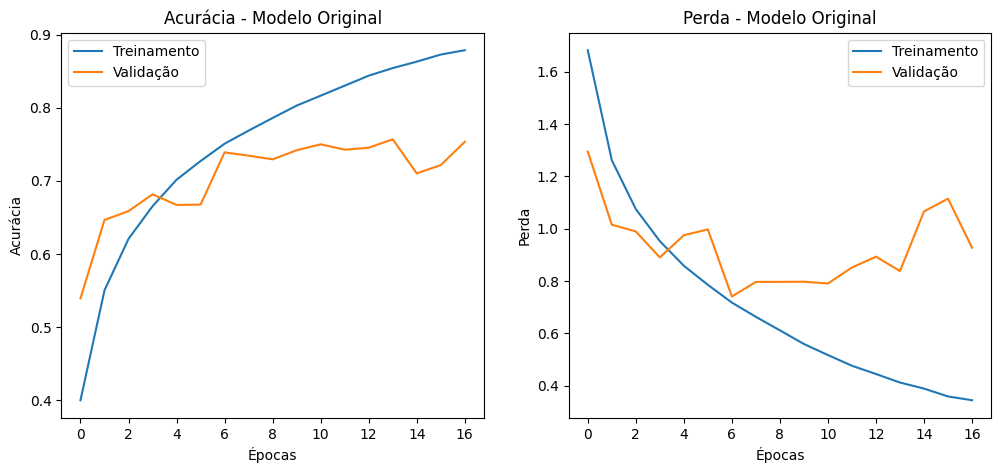

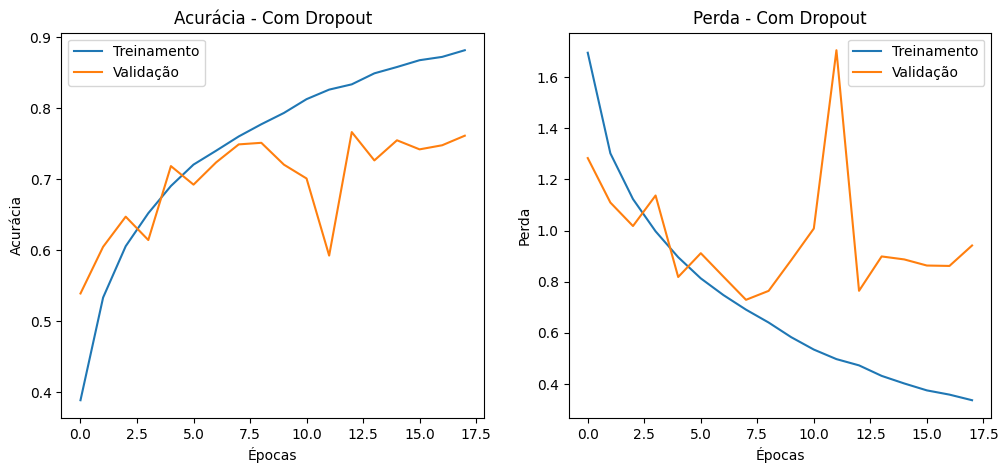

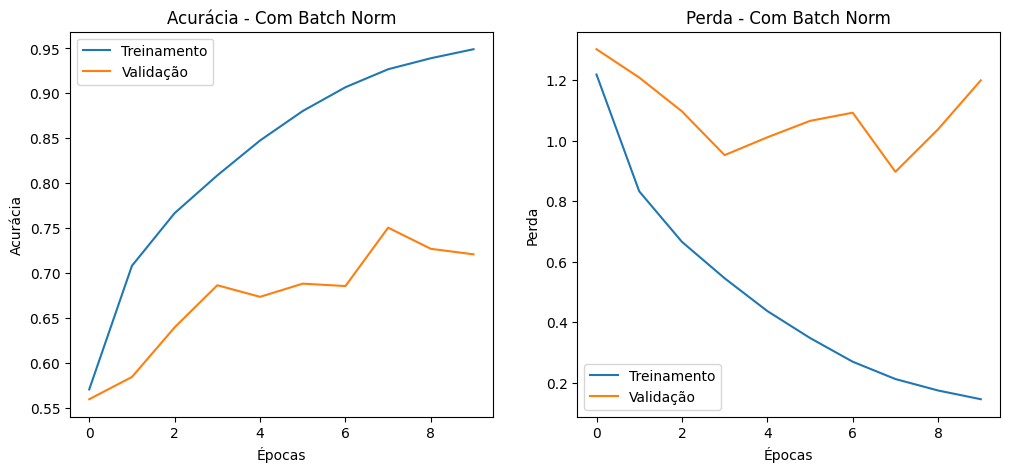

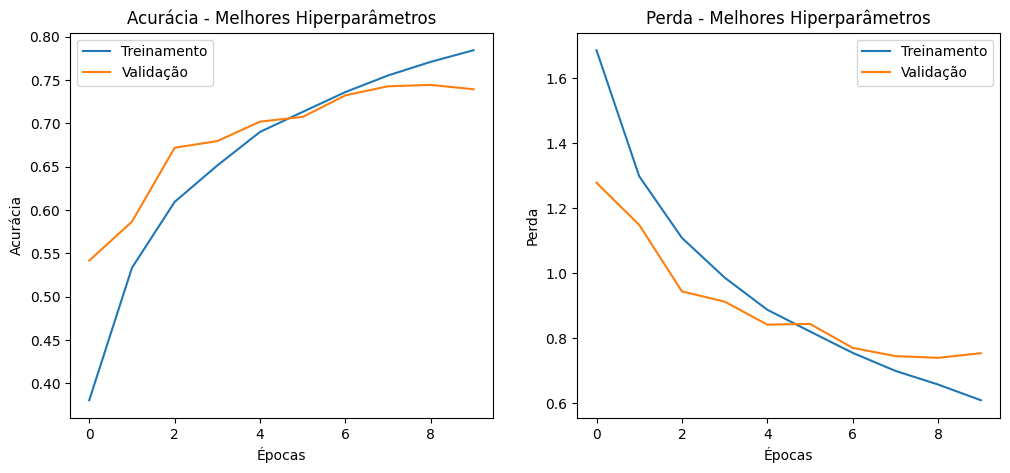

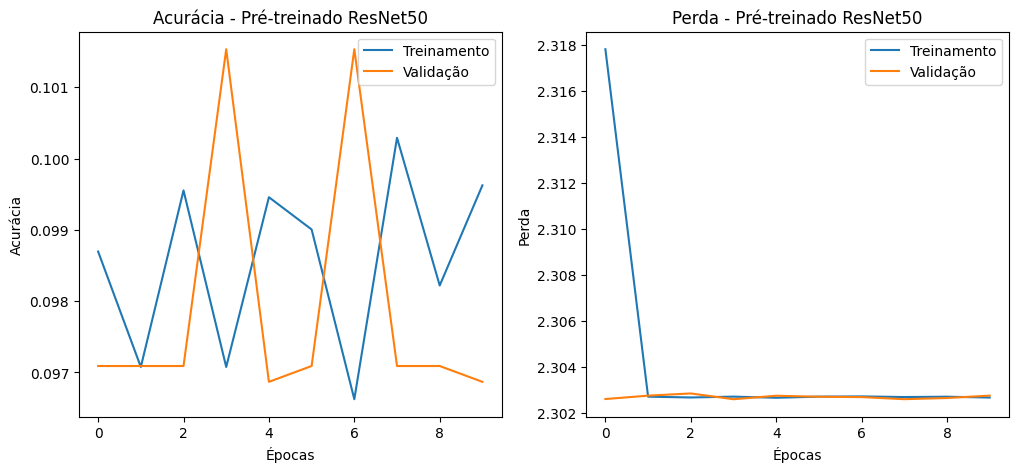

In [ ]:
def plot_history(histories, titles):
    for history, title in zip(histories, titles):
        plt.figure(figsize=(12,5))

        # Acurácia
        plt.subplot(1,2,1)
        plt.plot(history.history['accuracy'], label='Treinamento')
        plt.plot(history.history['val_accuracy'], label='Validação')
        plt.title(f'Acurácia - {title}')
        plt.xlabel('Épocas')
        plt.ylabel('Acurácia')
        plt.legend()

        # Perda
        plt.subplot(1,2,2)
        plt.plot(history.history['loss'], label='Treinamento')
        plt.plot(history.history['val_loss'], label='Validação')
        plt.title(f'Perda - {title}')
        plt.xlabel('Épocas')
        plt.ylabel('Perda')
        plt.legend()

        plt.show()

# Plotar as curvas
plot_history([history, history_dropout, history_batch, history_best, history_pretrained],
             ['Modelo Original', 'Com Dropout', 'Com Batch Norm', 'Melhores Hiperparâmetros', 'Pré-treinado ResNet50'])


## Exemplo de classificação correta e incorreta

Selecionando previsões

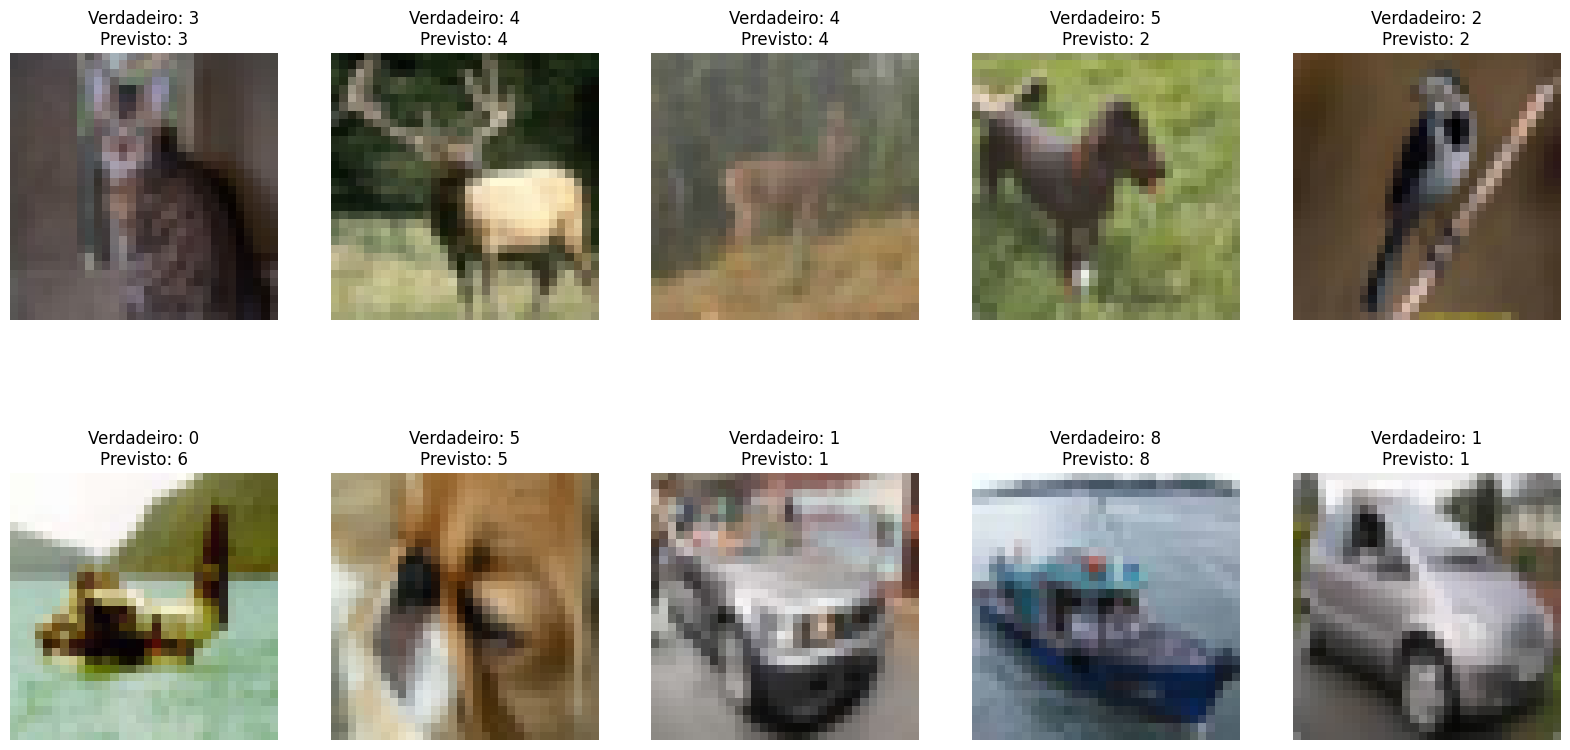

In [ ]:
num_examples = 10
plt.figure(figsize=(20,10))
for i in range(num_examples):
    idx = np.random.randint(0, X_test.shape[0])
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])
    pred_label = y_pred_classes[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Verdadeiro: {true_label}\nPrevisto: {pred_label}")
    plt.axis('off')
plt.show()


## Visualização de Feature Maps

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer_name = 'conv2d'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
feature_maps = intermediate_layer_model.predict(X_test[:1])

num_filters = feature_maps.shape[-1]
plt.figure(figsize=(20, 20))
for i in range(min(num_filters, 64)):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

ValueError: The layer sequential has never been called and thus has no defined input.